
-------- Logistic Regression --------

Accuracy: 0.935
Precision: 0.978
Recall: 0.935
Specificity: 1.000
F1 Score: 0.933



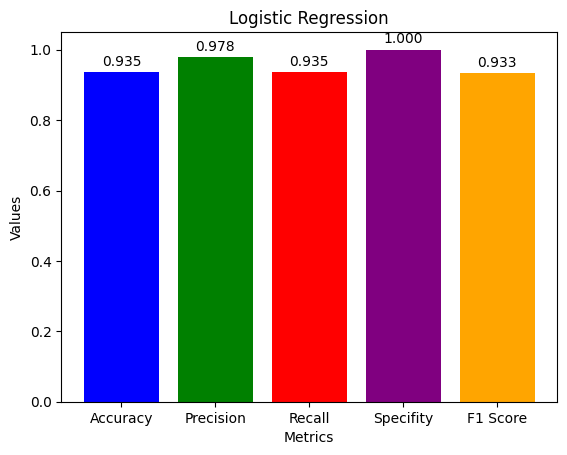


-------- K-Nearest Neighbors --------

Accuracy: 0.839
Precision: 0.925
Recall: 0.839
Specificity: 1.000
F1 Score: 0.821



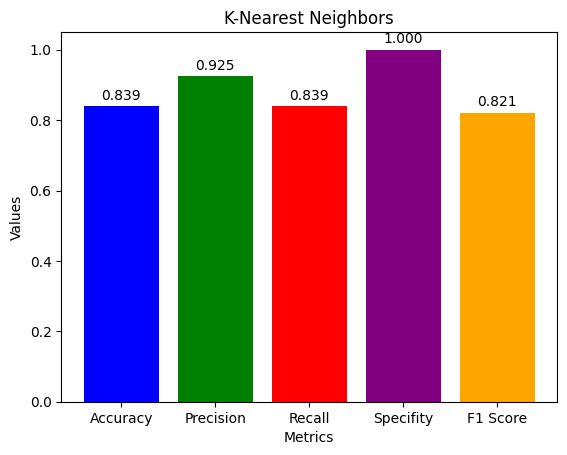


-------- Support Vector Machine --------

Accuracy: 0.903
Precision: 0.957
Recall: 0.903
Specificity: 1.000
F1 Score: 0.907



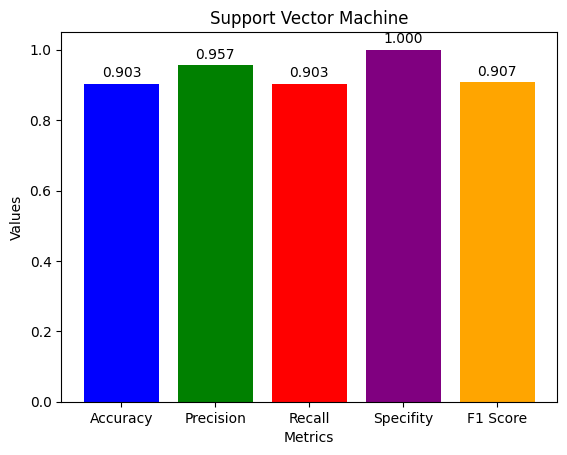


-------- Naive Bayes --------

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Specificity: 1.000
F1 Score: 1.000



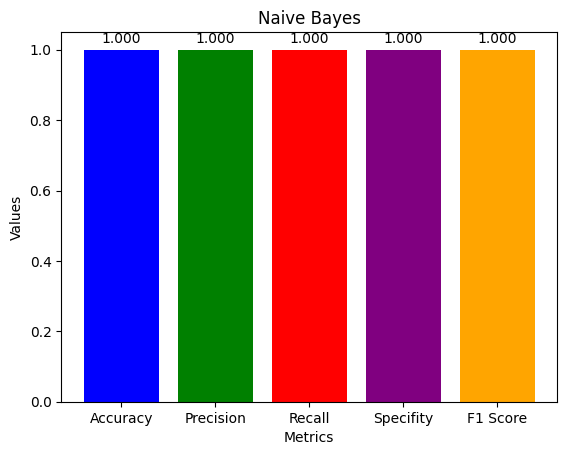

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

def load_data():
    # Cargar y dividir los datos de zoo dataset
    dataset = pd.read_csv('zoo.csv')
    X = dataset.drop(['animal_name', 'type'], axis=1)
    y = dataset['type']
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    return X_train, X_test, y_train, y_test

def evaluate_model(model_name, model, X_test, y_test):
    # Predicción en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()[:4]
    specificity = tn / (tn + fp)

    # Imprimir métricas
    print(f"\n-------- {model_name} --------\n")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"F1 Score: {f1:.3f}\n")

    # Graficar las métricas
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specifity', 'F1 Score']
    metrics_values = [accuracy, precision, recall, specificity, f1]
    plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title(model_name)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    # Añadir valores en cada barra
    for i, value in enumerate(metrics_values):
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
    plt.show()

def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    evaluate_model('Logistic Regression', model, X_test, y_test)

def k_nearest_neighbors(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    evaluate_model('K-Nearest Neighbors', model, X_test, y_test)

def support_vector_machine(X_train, X_test, y_train, y_test):
    model = SVC(C=1.0)
    model.fit(X_train, y_train)
    evaluate_model('Support Vector Machine', model, X_test, y_test)

def naive_bayes(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    evaluate_model('Naive Bayes', model, X_test, y_test)

# Evaluación de los clasificadores
X_train, X_test, y_train, y_test = load_data()
logistic_regression(X_train, X_test, y_train, y_test)
k_nearest_neighbors(X_train, X_test, y_train, y_test)
support_vector_machine(X_train, X_test, y_train, y_test)
naive_bayes(X_train, X_test, y_train, y_test)